In [18]:
# Libs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date

%matplotlib inline

In [23]:
dados = pd.read_csv('dados_original_bdmep.csv')

In [24]:
dados.head()

,Estacao,Data,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media
0,83985,01/01/1962,0,0.0,25.4,0.0,0.0,1.6,21.70,86.25,4.000000
1,83985,01/01/1962,1200,0.0,0.0,18.4,0.0,0.0,0.00,0.00,0.000000
2,83985,02/01/1962,0,0.0,29.2,0.0,0.0,1.0,23.16,76.00,0.666667
3,83985,02/01/1962,1200,15.8,0.0,20.0,0.0,0.0,0.00,0.00,0.000000
4,83985,03/01/1962,0,0.0,24.6,0.0,0.0,0.8,18.66,67.50,4.000000


In [25]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23802 entries, 0 to 23801
Data columns (total 11 columns):
Estacao                      23802 non-null int64
Data                         23802 non-null object
Hora                         23802 non-null int64
Precipitacao                 23802 non-null float64
TempMaxima                   23802 non-null float64
TempMinima                   23802 non-null float64
Insolacao                    23802 non-null float64
Evaporacao Piche             23802 non-null float64
Temp Comp Media              23802 non-null float64
Umidade Relativa Media       23802 non-null float64
Velocidade do Vento Media    23802 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 2.0+ MB


In [26]:
# Transforma Data string em numerica

dados['Dia'] = dados.Data.apply(lambda data : int(data.split('/')[0]))
dados['Mes'] = dados.Data.apply(lambda data : int(data.split('/')[1]))
dados['Ano'] = dados.Data.apply(lambda data : int(data.split('/')[2]))

# Remove data string
dados = dados.drop(['Data'], axis=1)

# Adiciona dia da semana

dados['Dia da Semana'] = np.array([date(dados.Ano.iloc[i], dados.Mes.iloc[i], dados.Dia.iloc[i]).weekday() for i in range(len(dados.Dia))])

dados.head()

,Estacao,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Dia,Mes,Ano,Dia da Semana
0,83985,0,0.0,25.4,0.0,0.0,1.6,21.70,86.25,4.000000,1,1,1962,0
1,83985,1200,0.0,0.0,18.4,0.0,0.0,0.00,0.00,0.000000,1,1,1962,0
2,83985,0,0.0,29.2,0.0,0.0,1.0,23.16,76.00,0.666667,2,1,1962,1
3,83985,1200,15.8,0.0,20.0,0.0,0.0,0.00,0.00,0.000000,2,1,1962,1
4,83985,0,0.0,24.6,0.0,0.0,0.8,18.66,67.50,4.000000,3,1,1962,2


In [27]:
# Explorando os dados, verifiquei que existem anos que nao estao presentes nos dados
# Nao existem dados relativos aos ano 1972-1976, 1985-1987, 1989-1990, 1992-1993, 1995 e 1999

anos = dados.Ano.unique()
anos

array([1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1988, 1991, 1994, 1996,
       1997, 1998, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [28]:
# Alem disso, ha meses faltando

mesesPorAno = {}

for ano in anos:
    mesesPorAno[ano] = dados[dados.Ano == ano].Mes.unique()
    
for i in range(1962, 2017):
    if i in mesesPorAno:
        print i, mesesPorAno[i]

1962 [ 1  3  4  5  6  7  8  9 10 11 12]
1963 [ 1  2  3  4  5  6  7  8  9 11 12]
1964 [ 1  2  3  4  5  6  8  9 10 11 12]
1965 [ 1  2  3  4  5  6  7  8  9 11 12]
1966 [ 1  3  4  5  6  7  8  9 10 11 12]
1967 [1]
1968 [ 2  3  4  5  6  7  9 10 11 12]
1969 [ 2  3  4  5  6  7  8  9 10 11 12]
1970 [ 1  2  4  6  7  8  9 10 11 12]
1971 [4]
1977 [ 9 10 11 12]
1978 [ 1  2  3  4  5  6  7  8  9 10 11 12]
1979 [ 1  2  3  4  5  6  7  8  9 10 11 12]
1980 [ 1  2  3  4  5  6  7  8  9 10 11 12]
1981 [ 1  2  3  4  5  6  7  8  9 10 11 12]
1982 [ 1  2  3  4  5  6  7  8  9 10 11 12]
1983 [ 1  2  3  4  5  6  7  8  9 10 11 12]
1984 [ 1  2  3  4  5  6  7  8  9 10 11 12]
1988 [5 6 7 8]
1991 [1]
1994 [ 1  2  3  4  5  6  7  8  9 10 11 12]
1996 [ 1  2  3  4  5  6  7  8  9 10 11 12]
1997 [ 1  2  3  4  5  6  7  8  9 10 11 12]
1998 [ 1  2  3  4  5  6  7  8  9 10 11 12]
2000 [ 1  2  3  4  5  6  7  8  9 10 11 12]
2001 [ 9 10 11 12]
2002 [ 1  2  3  4  5  6  7  8  9 10 11 12]
2003 [ 1  2  3  4  5  6  7  8  9 10 11 12]
2004

In [29]:
# Mito 1: se chove no dia de Sao Miguel (29 de Setembro) chove mais no mes de Outubro

# Seleciona somente os dados relativos a precipitacao
# Uma vez que a medicao de precipitacao nao eh feita na leitura da meia noite (Hora = 0), pode-se ignorar esses dados

precipitacao = dados[['Dia', 'Mes', 'Ano', 'Hora', 'Dia da Semana','Precipitacao']].copy()
precipitacao = precipitacao[precipitacao.Hora == 1200].drop(['Hora'], axis=1).reset_index().drop(['index'], axis=1)

precipitacao.head()

,Dia,Mes,Ano,Dia da Semana,Precipitacao
0,1,1,1962,0,0.0
1,2,1,1962,1,15.8
2,3,1,1962,2,2.4
3,4,1,1962,3,0.0
4,5,1,1962,4,0.0


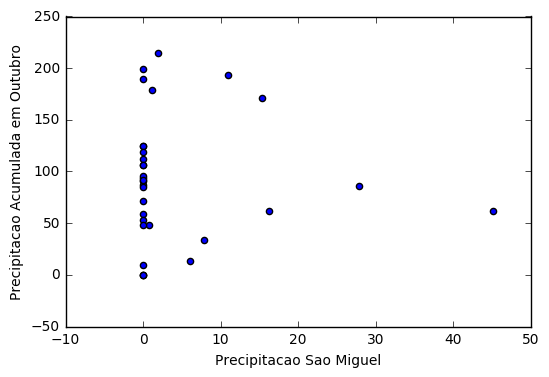

In [36]:
saoMiguel = precipitacao[(precipitacao.Dia == 29) & (precipitacao.Mes == 9)].copy().drop(['Dia', 'Mes', 'Dia da Semana'], axis=1).set_index('Ano')

outubros = precipitacao[precipitacao.Mes == 10].drop(['Dia', 'Mes', 'Dia da Semana'], axis=1).groupby('Ano').sum()

saoMiguel = saoMiguel.join(outubros, lsuffix=' Sao Miguel', rsuffix=' Acumulada em Outubro')
saoMiguel.plot(kind='scatter', x = 'Precipitacao Sao Miguel', y = 'Precipitacao Acumulada em Outubro')

# Parece que nao

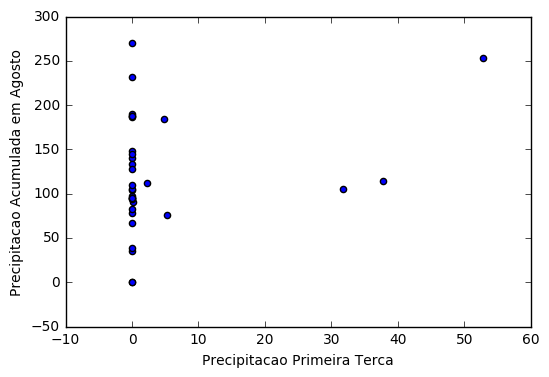

In [45]:
# Mito 2: se chove na primeira terca de Agosto, vai chover mais durante o mes

agostos = precipitacao[precipitacao.Mes == 8].copy()

primeiras_tercas = agostos[agostos['Dia da Semana'] == 1].copy().drop_duplicates(subset=['Ano'])
primeiras_tercas = primeiras_tercas[primeiras_tercas.Ano != 1979].drop(['Dia', 'Mes', 'Dia da Semana'], axis=1).set_index('Ano')

agostos = agostos.drop(['Dia', 'Mes', 'Dia da Semana'], axis=1).groupby('Ano').sum()

primeiras_tercas = primeiras_tercas.join(agostos, lsuffix=' Primeira Terca', rsuffix=' Acumulada em Agosto')
primeiras_tercas.plot(kind='scatter', x = 'Precipitacao Primeira Terca', y = 'Precipitacao Acumulada em Agosto')

In [46]:
# Existe uma correlacao, mesmo que nao muito elevada, entre as duas variaveis

primeiras_tercas.corr()

,Precipitacao Primeira Terca,Precipitacao Acumulada em Agosto
Precipitacao Primeira Terca,1.000000,0.253616
Precipitacao Acumulada em Agosto,0.253616,1.000000


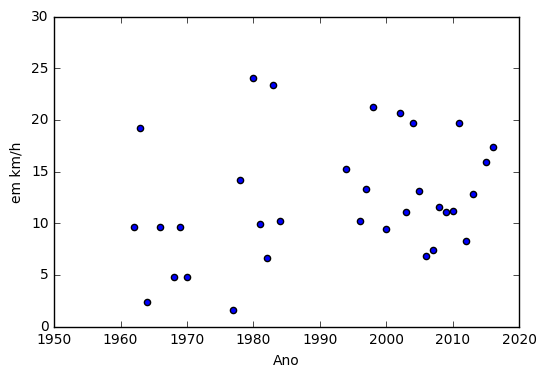

In [60]:
# Mito 3: vento de finados

vento = dados[['Dia', 'Mes', 'Ano', 'Hora', 'Velocidade do Vento Media']].copy()
vento = vento[vento.Hora == 0].drop(['Hora'], axis=1).reset_index().drop(['index'], axis=1)
vento['em km/h'] = vento['Velocidade do Vento Media'].apply(lambda v : v * 3.6)

finados = vento[(vento.Dia == 2) & (vento.Mes == 11)].drop(['Dia', 'Mes'], axis=1)
finados['Ano'] = finados.Ano.apply(lambda a : int(a))
finados.plot(kind='scatter', x='Ano', y='em km/h')

count    33.000000
mean     12.301818
std       5.854239
min       1.559999
25%       9.479999
50%      11.040001
75%      15.959999
max      24.000001
Name: em km/h, dtype: float64

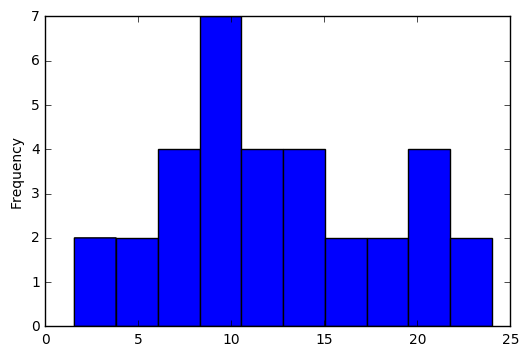

In [71]:
finados['em km/h'].plot(kind='hist')
finados['em km/h'].describe()

count    11796.000000
mean        10.912757
std          6.649911
min          0.000000
25%          6.599999
50%          9.839999
75%         14.400000
max         50.400000
Name: em km/h, dtype: float64

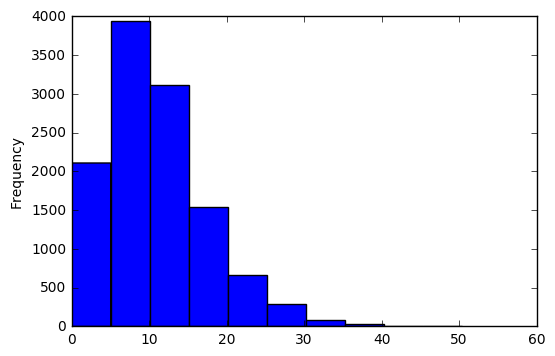

In [72]:
# Finados tem uma distribuicao com tendencia maior que o restante do ano?

vento['em km/h'].plot(kind='hist')
vento['em km/h'].describe()